# Example with a 4x4 grid

In [48]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a 4x4 grid：{}".format(small_board_list))

Arrange wheat on a 4x4 grid：[1, 2, 4, 8]


# First Step 2×2 squares number of wheat on the chessboard

In [50]:
import numpy as np

chessboard2x2= np.zeros((2,2), dtype=int)

chessboard2x2

array([[0, 0],
       [0, 0]])

# Adding the wheat in the right places


In [51]:
chessboard2x2[0,0] = 1 # Upper left square
chessboard2x2[0,1] = 2 # Upper right square
chessboard2x2[1,0] = 4 # Lower left square
chessboard2x2[1,1] = 8 # Lower right square

print ('The new array is : {}'.format(chessboard2x2))

The new array is : [[1 2]
 [4 8]]


# Total number of wheat function


In [52]:
import numpy as np

def wheat_chessboard(n , m):
    num_squares= n*m

    exponents = np.arange(num_squares, dtype=object) # We are simulating the chessboard here

    wheat_quantity = np.array([2**i for i in exponents], dtype=object)

    return wheat_quantity.reshape((n,m))




# Total number of wheat in a 8x8 square

In [53]:
chessboard = wheat_chessboard(8 , 8);

print(f"Total number of wheat in the board is: {chessboard.sum()}")

Total number of wheat in the board is: 18446744073709551615


# Find the average of each column and visualize it

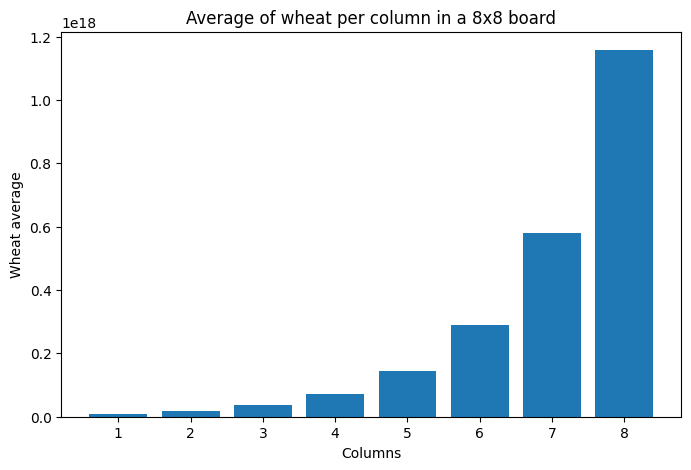

In [54]:
column_means = chessboard.mean(axis=0, dtype=object)

plt.figure(figsize=(8, 5))
plt.bar(range(1, 9), [int(x) for x in column_means]) 
plt.xlabel("Columns")
plt.ylabel("Wheat average")
plt.title("Average of wheat per column in a 8x8 board")
plt.show()

# HeatMap

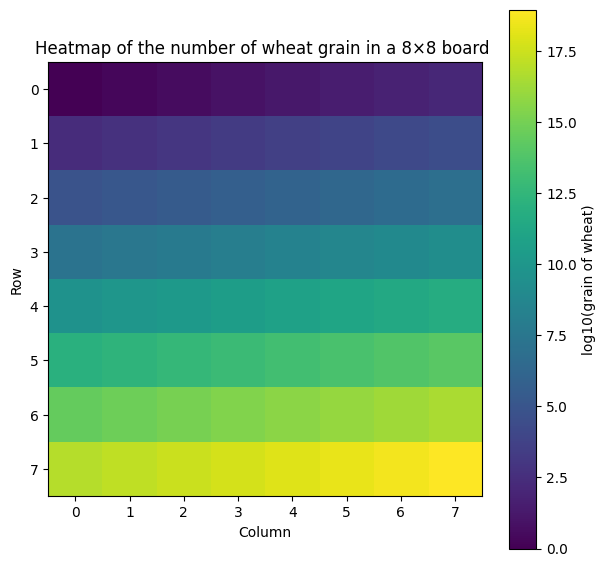

In [58]:
import numpy as np
import matplotlib.pyplot as plt



# Tablero 8x8
chessboard = wheat_chessboard(8, 8)

# Heatmap (usamos log para que los colores no se saturen)
plt.figure(figsize=(7, 7))
plt.imshow(np.log10(chessboard.astype(float)), cmap="viridis")
plt.colorbar(label="log10(grains of wheat)")
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap of the number of wheat grain in a 8×8 board ")
plt.show()


# Second half of the chessboard

In [60]:
first_half = chessboard[:4, :].sum()
second_half = chessboard[4:, :].sum()

ratio = second_half / first_half

print(f"Grains in the first half: {first_half}")
print(f"Grains in the second half: {second_half}")
print(f"The second half has {ratio} more wheat than the first.")


Grains in the first half: 4294967295
Grains in the second half: 18446744069414584320
The second half has 4294967296.0 more wheat than the first.


#  Method np.append() 

In [65]:
n_squares = 64
board_ndarray = np.array([1], dtype=object)
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1])

chessboard_append = board_ndarray.reshape((8, 8))



# Broadcasting Method

In [68]:
n_squares = 64
indices_of_squares = np.arange(n_squares, dtype=object)
board_ndarray = 2 ** indices_of_squares
chessboard_broadcast = board_ndarray.reshape((8, 8))

chessboard_broadcast

array([[1, 2, 4, 8, 16, 32, 64, 128],
       [256, 512, 1024, 2048, 4096, 8192, 16384, 32768],
       [65536, 131072, 262144, 524288, 1048576, 2097152, 4194304,
        8388608],
       [16777216, 33554432, 67108864, 134217728, 268435456, 536870912,
        1073741824, 2147483648],
       [4294967296, 8589934592, 17179869184, 34359738368, 68719476736,
        137438953472, 274877906944, 549755813888],
       [1099511627776, 2199023255552, 4398046511104, 8796093022208,
        17592186044416, 35184372088832, 70368744177664, 140737488355328],
       [281474976710656, 562949953421312, 1125899906842624,
        2251799813685248, 4503599627370496, 9007199254740992,
        18014398509481984, 36028797018963968],
       [72057594037927936, 144115188075855872, 288230376151711744,
        576460752303423488, 1152921504606846976, 2305843009213693952,
        4611686018427387904, 9223372036854775808]], dtype=object)

# which is faster?

In [72]:
import timeit
import numpy as np

def method_append():
    n_squares = 64
    arr = np.array([1], dtype=object)
    for _ in range(n_squares - 1):
        arr = np.append(arr, 2 * arr[-1])
    return arr

def method_broadcast():
    n_squares = 64
    return np.power(2, np.arange(n_squares, dtype=object))

# Medir tiempos
append_time = timeit.timeit(method_append, number=1000)
broadcast_time = timeit.timeit(method_broadcast, number=1000)

print(f"Time of append: {append_time:.6f} s")
print(f"Time of broadcast: {broadcast_time:.6f} s")


Time of append: 0.425730 s
Time of broadcast: 0.014017 s


### Conclusion as we can see the broadcast method is faster than append